In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
data = pd.read_csv("autoscout24.csv")

In [6]:
data.head(20)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [121]:
data.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [128]:
# Missing values:
print(data.isnull().sum())

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


In [133]:
# drop NaN values from features with object-type: "model" and "gear" 
data = data.dropna(subset=["model", "gear"])
print(data.isnull().sum())

mileage       0
make          0
model         0
fuel          0
gear          0
offerType     0
price         0
hp           24
year          0
dtype: int64


In [135]:
# substitute NaN values from features with numeric-type with median value: "hp"
data["hp"] = data["hp"].fillna(data["hp"].median())
print(data.isnull().sum())

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64


C:\Users\Oliver\AppData\Local\Temp\ipykernel_53540\3855846377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["hp"] = data["hp"].fillna(data["hp"].median())


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46095 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46095 non-null  int64  
 1   make       46095 non-null  object 
 2   model      46095 non-null  object 
 3   fuel       46095 non-null  object 
 4   gear       46095 non-null  object 
 5   offerType  46095 non-null  object 
 6   price      46095 non-null  int64  
 7   hp         46095 non-null  float64
 8   year       46095 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


In [9]:
data.shape

(46405, 9)

In [12]:
data.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [16]:
data.groupby('year').first()

,mileage,make,model,fuel,gear,offerType,price,hp
year,,,,,,,,
2011,235000,BMW,316,Diesel,Manual,Used,6800,116.0
2012,44800,Kia,Picanto,Gasoline,Automatic,Used,7850,86.0
2013,73760,Opel,Zafira,Gasoline,Manual,Used,8990,140.0
2014,45600,Ford,Fiesta,Gasoline,Manual,Used,8990,80.0
2015,140000,Volkswagen,Golf Variant,Diesel,Automatic,Used,9990,110.0
2016,29000,Suzuki,Swift,Gasoline,Manual,Used,8990,94.0
2017,66106,Audi,A4,Gasoline,Automatic,Used,20990,150.0
2018,66990,Audi,A6 allroad,Diesel,Automatic,Used,31880,272.0
2019,13710,Ford,Focus,Gasoline,Automatic,Used,26480,150.0


In [24]:
data.groupby('make').first().sort_values("make")

,mileage,model,fuel,gear,offerType,price,hp,year
make,,,,,,,,
9ff,39500,None,Gasoline,Manual,Used,7000,20.0,2018
Abarth,21500,500,Gasoline,Manual,Used,11850,160.0,2015
Aixam,5,City,Diesel,Automatic,Used,17370,8.0,2021
Alfa,120000,Romeo Giulietta,Gasoline,Manual,Used,6000,120.0,2011
Alpina,27223,B3,Gasoline,Automatic,Used,80990,409.0,2013
...,...,...,...,...,...,...,...,...
Trucks-Lkw,312000,Ford,Diesel,None,Used,8200,131.0,2016
Volkswagen,92800,Golf,Gasoline,Manual,Used,6877,122.0,2011
Volvo,60188,XC90,Diesel,Automatic,Used,45990,235.0,2018


In [36]:
data.groupby('make').count()

,mileage,model,fuel,gear,offerType,price,hp,year
make,,,,,,,,
9ff,1,0,1,1,1,1,1,1
Abarth,43,43,43,43,43,43,43,43
Aixam,3,2,3,3,3,3,2,3
Alfa,132,132,132,130,132,132,132,132
Alpina,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...
Trucks-Lkw,1,1,1,0,1,1,1,1
Volkswagen,6931,6921,6931,6916,6931,6931,6931,6931
Volvo,804,803,804,803,804,804,804,804


<Axes: ylabel='make'>

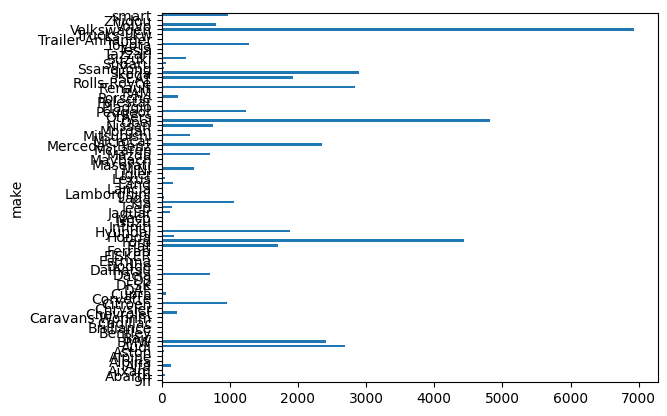

In [35]:
data.groupby('make')["make"].count().plot(kind="barh")

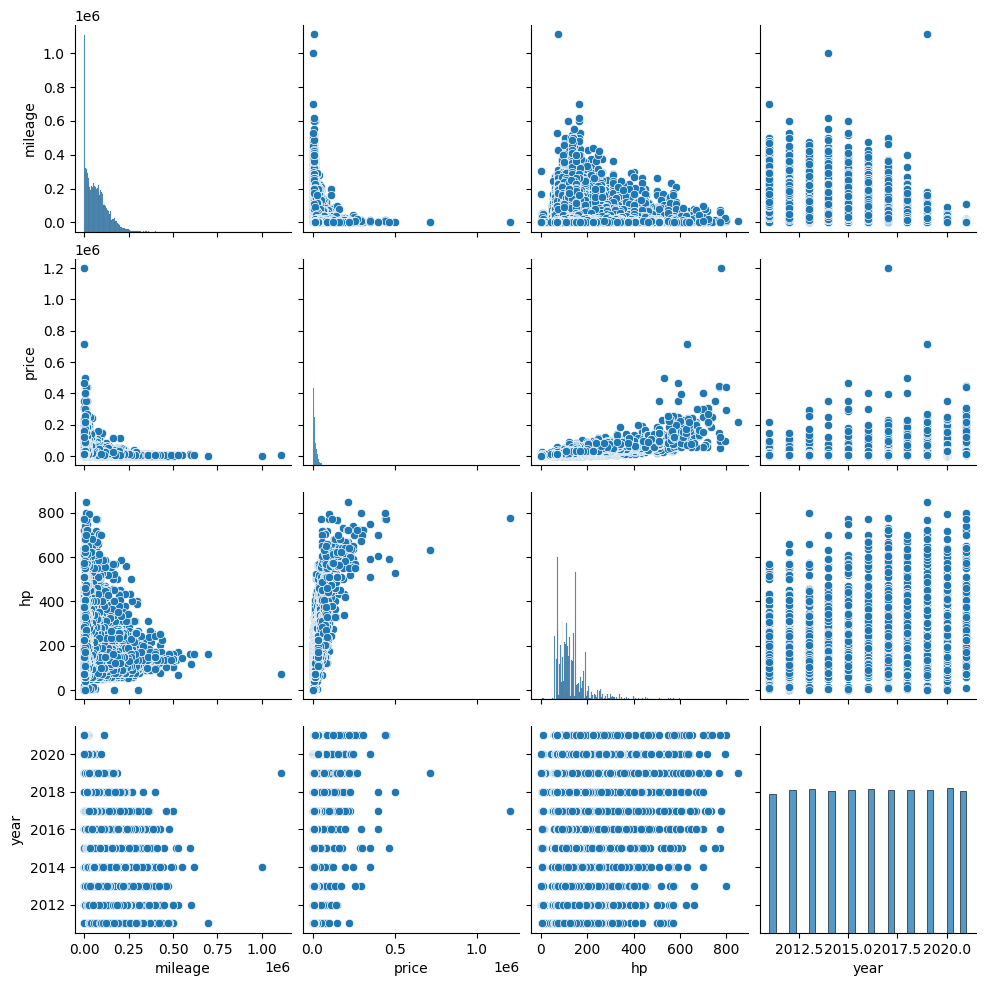

In [37]:
sns.pairplot(data)

In [96]:
data.groupby('make')["make"].count().sort_values(ascending=False).head(5)

make
Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
Name: make, dtype: int64

In [111]:
vw = data["make"] == "Volkswagen"
opel = data["make"] == "Opel"
ford = data["make"] == "Ford"
skoda = data["make"] == "Skoda"
renault = data["make"] == "Renault"

selected_brands = vw | opel | ford | skoda | renault

In [118]:
data[selected_brands].groupby("make")["price"].mean().sort_values(ascending=False)

make
Volkswagen    16065.926995
Ford          13791.453399
Skoda         13723.617515
Renault       11288.500353
Opel          10442.955339
Name: price, dtype: float64